LAB-3 15-02-2024


<ipython-input-1-cff6fb43d68f>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(original_audio_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


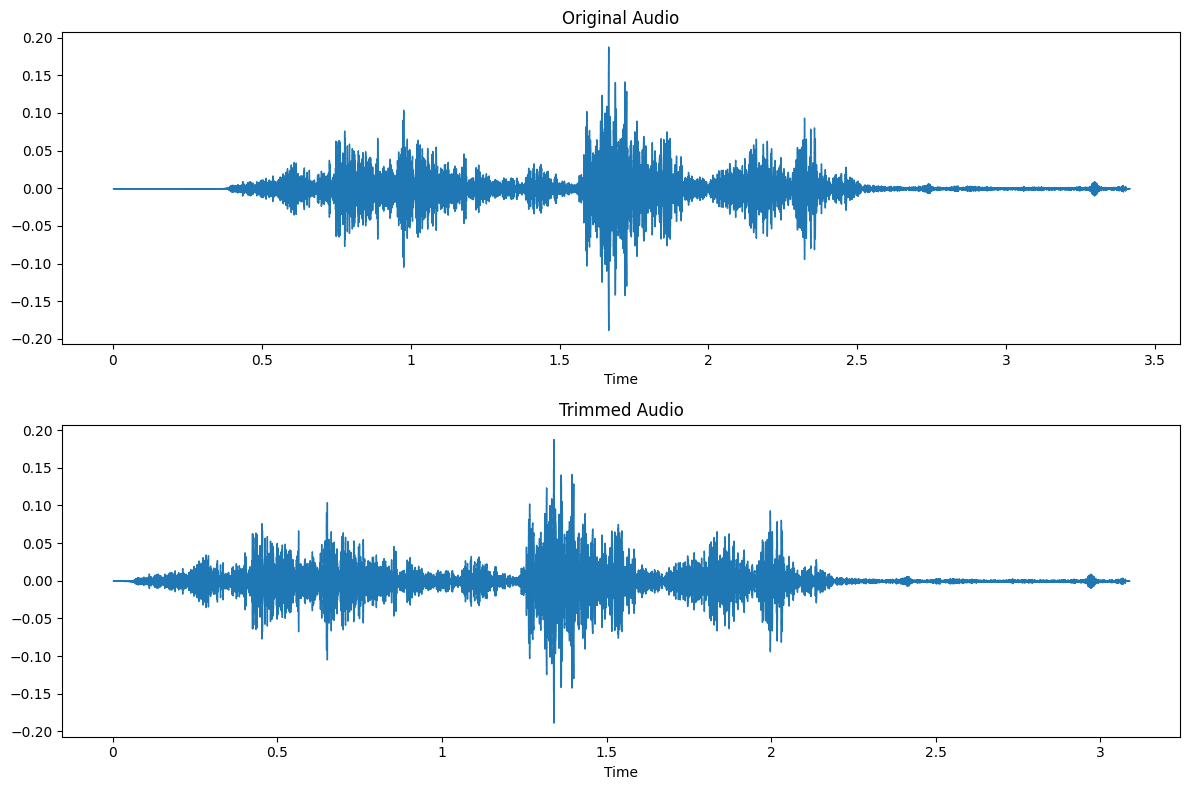

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the original audio file
original_audio_path = "AI in speech processing.m4a"
y, sr = librosa.load(original_audio_path)

# Trim the silence
trimmed_audio, index = librosa.effects.trim(y)

# Plot the original and trimmed signals
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')

plt.subplot(2, 1, 2)
librosa.display.waveshow(trimmed_audio, sr=sr)
plt.title('Trimmed Audio')

plt.tight_layout()
plt.show()


<ipython-input-2-d0ffc2970b93>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(original_audio_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


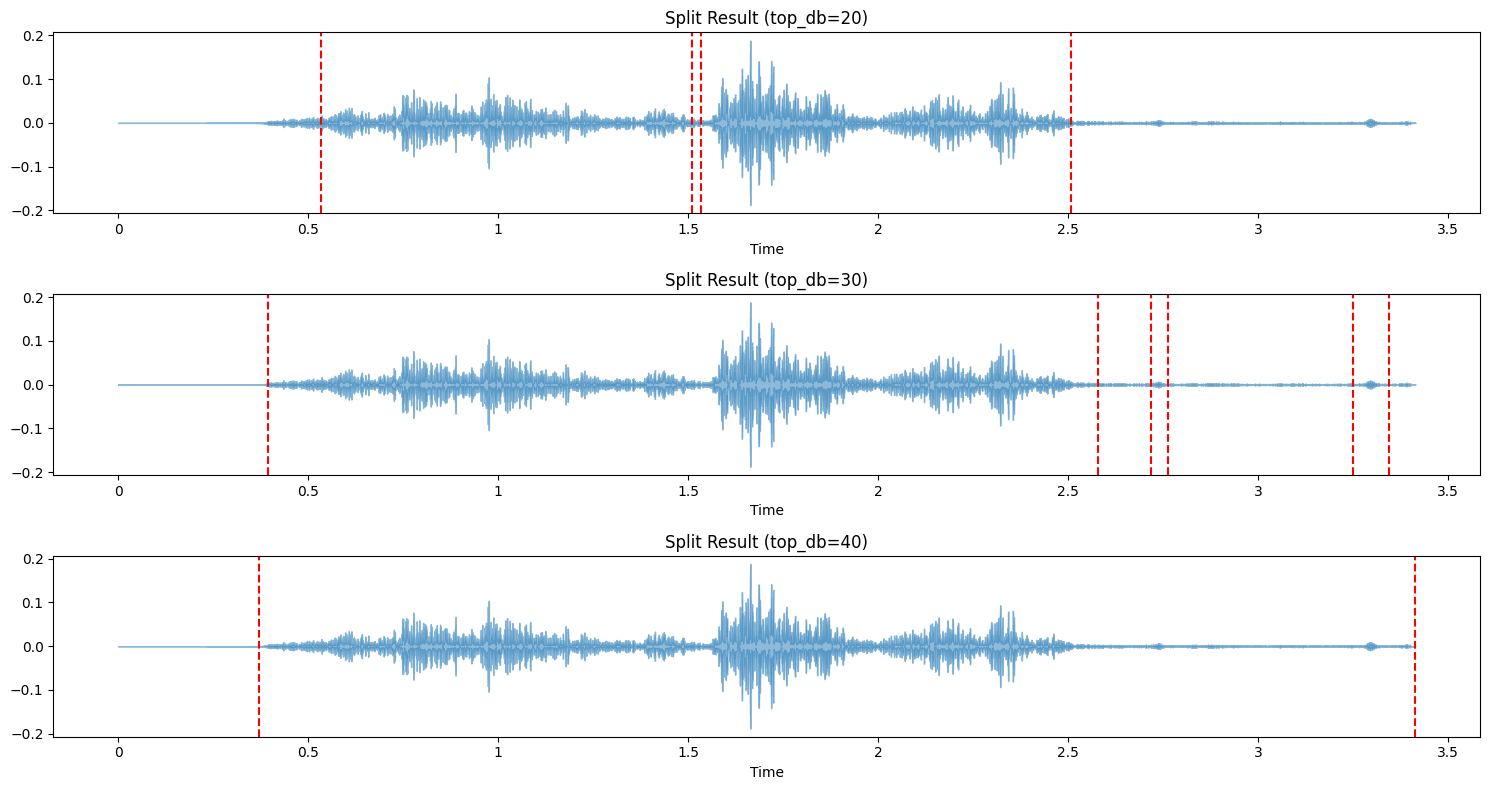

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Load the original audio file
original_audio_path = "AI in speech processing.m4a"
y, sr = librosa.load(original_audio_path)

# Adjust the top_db parameter to control the threshold for silence detection
top_db_values = [20, 30, 40]

# Plot and listen for different top_db values
plt.figure(figsize=(15, 8))

for i, top_db in enumerate(top_db_values):
    # Split the audio based on silence detection
    intervals = librosa.effects.split(y, top_db=top_db)

    plt.subplot(len(top_db_values), 1, i+1)
    plt.title(f'Split Result (top_db={top_db})')

    # Visualize the original signal
    librosa.display.waveshow(y, sr=sr, alpha=0.5)

    # Highlight the detected silences
    for interval in intervals:
        plt.axvline(librosa.samples_to_time(interval[0]), color='r', linestyle='--')
        plt.axvline(librosa.samples_to_time(interval[1]), color='r', linestyle='--')

    # Listen to the split signal
    split_signal = librosa.effects.remix(y, intervals=intervals)
    Audio(split_signal, rate=sr)

plt.tight_layout()
plt.show()